# Physics 77, Lecture 3:  CSV, Functions, Loops,  and Array

## September 19, 2022
- Course announcement 
- outline

### Message from Shrihan 

Python Peer Tutoring @ Campbell 501B
Shrihan Agarwal

Hi all,

I'm Shrihan Agarwal, the SLC Python Tutor for Physics/Astronomy. I'll be holding peer tutoring (homework help, general questions) at Campbell 501B Mondays and Wednesdays from 4-6 PM. Please come if you're interested!

The room is a little hard to find, but 5th floor Campbell, enter the Department of Astronomy Main Office, take a left, and it's at the end of the hallway.

#### Please utilize this great resource. Have a question with Python? Go to get help from Shrihan. 

### Message from Daniel Huang

This is Daniel, your course Connector Assistant! Just wanted to update you all that for this upcoming week, I will be holding office hours on Monday 9/12 in Berkeley Way West on the first floor from 9:00AM - 10:00AM. This will be my OH schedule for this upcoming week only.

I am currently in the process of acquiring a room in Physics North/Birge Hall for me to hold OH. The bCourses page will be updated with my finalized OH schedule and location hopefully by the end of this upcoming week.

#### Daniel, any update?

### Online discussion platform 
- please join us at 
https://edstem.org/us/join/acjwE8
- post your questions there
- our answers could be seen by your fellow students


### My office hour this week changed to Friday 12 pm - 1 pm, in-person, Physics South 423

## Outline
* today
    * We will use the example from Friday as a case study to motivate the topics of today 
    * string operation, for loops, while loops, if else structure, continue, break, use of fucntions
    * numpy array 
    * The same exploratory task is at the end of this notebook
        * at the end of this notebook, you should be able to complete the task
    

In [ ]:
def Type(x):
    print(x)
    print(type(x))

# Example from Friday's workshop

## Let's start with something you've done on Friday

In [ ]:
import csv
f_csv = open( 'nationData.csv', 'w' )

SA_writer = csv.writer( f_csv,                 # write to this file object
                           delimiter = '|',          # place vertical bar between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )


countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',\
             'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
capitals = ['Buenos Aires', 'Sucre', 'Brasília', 'Santiago', 'Bogotá', 'Quito', 'Georgetown',\
             'Asunción', 'Lima', 'Paramaribo', 'Montevideo', 'Caracas']
population_mils = [ 42.8, 10.1, 203.4, 16.9, 46.4, 15.0, 0.7, 6.5, 29.2, 0.5,\
                      3.3, 27.6]

SA_writer.writerow(['Data on South American Nations'])
SA_writer.writerow(['Country', 'Capital', 'Populaton (millions)'])
for i in range(len(countries)):
    SA_writer.writerow( [countries[i], capitals[i], population_mils[i]] )
f_csv.close()

%cat nationData.csv

## now I want to read this csv file and 
- pick countries whose name contains the letter "a"
- format it with latex
- copy and paste it to an overleaf project


In [ ]:
f = open('nationData.csv','r')
# how do we read a csv file?

csv_content = csv.reader(f,delimiter ='|')

Type(csv_content)
#next(csv_content) this is how we skip a line

for row in csv_content:
    Type(row)

In [ ]:
# so each entry in the csv.reader object is just a list
f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

g = open('reformatted_nationData.txt','w')

for row in csv_content:
#    Type(row)

#    print(len(row))

#    g.write(Type(row))
    
    g.write(row[0])
    g.write(' & ')
    g.write(row[1])
    g.write(' & ')
    g.write(row[2])
    g.write(' \\\ \n')
    
%cat reformatted_nationData.txt
    
#    NewLine = row[0].replace(",","&")

#    g.write(NewLine)

In [ ]:
# Now that I'm done with the formatting
# I'll move all these lines into a function 
# so that the code becomes cleaner
f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

g = open('reformatted_nationData.txt','w')

def txt_writer( g, x ):
    g.write(row[0])
    g.write(' & ')
    g.write(row[1])
    g.write(' & ')
    g.write(row[2])
    g.write(' \\\ \n')
    

for row in csv_content:

# now we need to find countries whose name has a letter "a"    
    
#    Type(row[0])
#     if 'a' in row[0]:
#         print(row[0])

    if not('a' in row[0]):
#        print(row[0])
        continue # continue would skip the remaining lines within the loop

    txt_writer(g,row)


g.close()    
    
%cat reformatted_nationData.txt
    
#    NewLine = row[0].replace(",","&")

#    g.write(NewLine)

In [ ]:
import numpy as np
data = np.genfromtxt("reformatted_nationData.txt")
print(data)

In [ ]:
data = np.genfromtxt("reformatted_nationData.txt", delimiter='&')
print(data)
#why?

In [ ]:
g =open("reformatted_nationData.txt",'r')
g2 = open("nationData_without_DBS.txt","w")
for line in g:
    newline = line.replace("\\", "") # Replace!
    g2.write(newline + '\n')

g2.close()
#%cat nationData_without_DBS.txt

data = np.genfromtxt("nationData_without_DBS.txt", delimiter='&')
print(data)

In [ ]:
print(data.shape)
print(data.ndim)
print(data.size)
population=data[:,2]
print(population)

# Recap

- ### CSV 
    - We wrote some data into a csv file
    - CSV stands for Comma Separated Values, however, the delimiter doesn't have to be a comma. In our example, we used the pipe (vertical bar) symbol as the delimiter
    - Reading csv file with csv.reader would return a csv.reader object. This csv.reader object has a collection of lists, which can be retrieved using a for loop
    - Each list has elements parsed from the csv file. The delimiters are removed. 
    - use the python built-in method next to skip lines in a file

- ### Function
    - when some operations are repetitve (such as those appearing in a loop), we create a function for that set of operations
    - the function needs to be defined before it is "called"
    - the function may have some input arguments. In our example, the input includes a list, and a file object
    - the function may or may not have a returning value. In our case, the function does one thing that is write several lines to a txt file, and the function doesn't have a returning value
    
- ### String operations
    - (x in y) is the way to find if string y contains a substring of x, this line is a boolian variable
    - new_string = old_string.replace("a", "b") would replace a in the old_string by b, but you would need to assign the modified string to a new variable. This operation doesn't modify the original string.
    - the replace method comes in handy when you want to change delimiter or eliminate useless things in a string (e.g., spaces) 
    
- ### Numpy array
    - one can load a csv file or a text file to a numpy array, using the method `genfromtxt`
    - for a csv-style file, one would need to identify the delimiter

# Control structures 

- ### while
- ### for
- ### if else
- ### continue and break

- the idea of a while loop is pretty simple
    - there is a condition, which is placed after `while` 
    - as long as the condition is true, the loop goes on 
    - some operation within the loop, in principle, at some point, should change the condition to false, then the loop stops

In [ ]:
def does_something():
    return False 

mycondition = True

while mycondition:
    mycondition=does_something()

In [ ]:

f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')


g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines() # reading lines in a txt file to a List

Type(Lines)

# we need an index to retrieve content of the List
i = 0 

while i < len(Lines):
    print(i, Lines[i])
    i += 1    


- let's introduce some control structures 
    - if else
        - if the country name starts with letter B, print out "The initial of the country name is B"
        - if not, print out "The initial of the country name is not B"

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    print(name)
    i +=1

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    if name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    else:
        print(name + ': Country\s name doesn\'t start with B')
    i +=1

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    if name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    elif name[0] == 'C':
        print(name + ': Country\s name has the initial of C')
    elif name[0] == 'A':
        print(name + ': Country\s name has the initial of A')
    i +=1

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    if name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    elif name[0] == 'C':
        print(name + ': Country\'s name has the initial of C')
    elif name[0] == 'A':
        print(name + ': Country\'s name has the initial of A')
    else:
        print(name + ': Country\'s initial is neither A, B, nor C')       
    i +=1

### continue and break
- just now, we saw the print out has 
    - ": Country's initial is neither A, B, nor C"
    - before the colon, there's nothing
    - this is because the txt file has an empty line for every other line
    - Let's use this as an opportunity to introduce continue and break 

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    if name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    elif name[0] == 'C':
        print(name + ': Country\'s name has the initial of C')
    elif name[0] == 'A':
        print(name + ': Country\'s name has the initial of A')
    else:            
        print(name + ': Country\'s initial is neither A, B, nor C')       
    i +=1

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    if Lines[i] == '\n':
        i += 1
        continue
    name = Lines[i].split("&")[0]  # <--- Let's talk about what this line does
    if name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    elif name[0] == 'C':
        print(name + ': Country\'s name has the initial of C')
    elif name[0] == 'A':
        print(name + ': Country\'s name has the initial of A')
    else:
        print(name + ': Country\'s initial is neither A, B, nor C')       
    i +=1

In [ ]:
# how about skips countries whose initials are neither A, B, nor C

g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):
    if Lines[i] == '\n':
        i += 1
        continue
    name = Lines[i].split("&")[0]  
    if not (name[0] == 'A' or name[0] == 'B' or name[0] == 'C'): # <--- Let's talk about what this line does
        i += 1
        continue 
    elif name[0] == 'B':
        print(name + ': Country\'s name has the initial of B' ) # \ is an escape
    elif name[0] == 'C':
        print(name + ': Country\'s name has the initial of C')
    elif name[0] == 'A':
        print(name + ': Country\'s name has the initial of A')
    else:
        print(name + ': Country\'s initial is neither A, B, nor C')       
    i +=1

### How about *break* ?

- as an example: after we print out the line of Ecuador, we'll just stop the printout
    - here we can use break

In [ ]:
g2 = open("nationData_without_DBS.txt","r")
Lines = g2.readlines()

print(Lines)
i = 0
while i < len(Lines):

# skip the empty lines    
    if Lines[i] == '\n':
        i += 1
        continue
        
    name = Lines[i].split("&")[0]  
    print (Lines[i])
    if name == 'Ecuador':
        break
    i +=1

    

### sorting with dictionary
Before we move to numpy array discussion, let's try to sort these countries based on their capital population

In [ ]:

dictionary ={} 
dictionary[10.1] = 'Bolivia'
print(dictionary)





In [ ]:
f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

p2c ={} # population to country
p2cap = {} # population to capital

for row in csv_content:
    print(row)
    p2c[row[2]] = row[0]
    p2cap[row[2]] = row[1]

print(p2c, p2cap)
    

In [ ]:
# let's sort population data
# for that purpose, we need to create a list object to store population data

dictionary ={} 
dictionary[10.1] = 'Bolivia'
print(dictionary)


f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

p2c ={} # population to country
p2cap = {} # population to capital

population = []
for row in csv_content:
    print(row)
    p2c[row[2]] = row[0]
    p2cap[row[2]] = row[1]
    population.append(row[2])
    
print(p2c, p2cap)

print(population)
    
    
    

In [ ]:
population.sort()
print(population)



In [ ]:
# Let's make sure that numbers are converted to float 

dictionary ={} 
dictionary[10.1] = 'Bolivia'
print(dictionary)


f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

p2c ={} # population to country
p2cap = {} # population to capital

population = []
for row in csv_content:
    print(row)
    p2c[float(row[2])] = row[0]
    p2cap[float(row[2])] = row[1]
    population.append(float(row[2]))
    
print(p2c, p2cap)

print(population)
 
# see what's different beteween the printout here and from the previous cell?    

In [ ]:
population.sort()
print(population)

In [ ]:
population.sort(reverse=True)
print(population)

In [ ]:
for x in population:
    print(p2c[x]+'\'s capital is ' + p2cap[x] + ', and it has a population of ' + str(x) + ' million people'  )

In [ ]:
# make c2p
f = open('nationData.csv','r')
csv_content = csv.reader(f,delimiter ='|')

next(csv_content)
next(csv_content)

c2p ={}
cap2p = {} 


for row in csv_content:
    print(row)
    c2p[row[0]] = float(row[2])
    cap2p[row[1]] = float(row[2])



### Let's recap
- for loop
- while loop
- if else
- continue 
- break
- dictionary
    - dictionary is a data structure, used to create map/lookup tables, i.e., one-to-one correspondence between different quantities 

In [ ]:
# I copied the area of each South American country from Wikipedia
# into area.txt
# https://en.wikipedia.org/wiki/List_of_South_American_countries_by_area

%cat area.txt

# Let's see how we parse this file and retrive data


In [ ]:
f = open('area.txt','r')

for line in f:
    print(line.split("\t"))

In [ ]:
f = open('area.txt','r')

countries = []
areas = []
c2a = {}
a2c = {}

for line in f:
    countries.append( line.split('\t')[1] )
    capital = line.split('\t')[1]
    print(capital.strip())
    
    #areas.append(float(line.split('\t')[2])) 
    #c2a['']
print(countries)

In [ ]:
f = open('area.txt','r')

countries = []
areas = []
c2a = {}
a2c = {}

for line in f:
    countries.append( line.split('\t')[1] )
    capital = line.split('\t')[1].strip()
    
    areas.append(float(line.split('\t')[2])) 
    #c2a['']
print(countries)

In [ ]:
f = open('area.txt','r')

countries = []
areas = []
c2a = {}
a2c = {}

for line in f:
    countries.append( line.split('\t')[1] )
    capital = line.split('\t')[1].strip()

# we'll need to remove the comma's in the string
    area_value = line.split('\t')[2].replace(",","")
    print(area_value)
    areas.append(area_value) 
    #c2a['']
print(countries)

In [ ]:
f = open('area.txt','r')

countries = []
areas = []
c2a = {}
a2c = {}

for line in f:
    countryname = line.split('\t')[1].strip()
    countries.append( countryname )

# we'll need to remove the comma's in the string
    area_value = line.split('\t')[2].replace(",","")
    #print(area_value)
    areas.append(area_value) 
    c2a[countryname]=float(area_value)
    a2c[float(area_value)]=countryname

print(countries)
print(areas)
print(a2c)
print(c2a)


In [ ]:
#%cat totalpopulation.txt

f = open('totalpopulation.txt','r')

countries = []
totpop = []
c2tp = {}
tp2c = {}

for line in f:
#    print((line.split(" ")[1]).split('\t'))
    
    countryname = (line.split(" ")[1]).split('\t')[0]
    countries.append( countryname )
    
# we'll need to remove the comma's in the string
    pop_value = (line.split(" ")[1]).split('\t')[1].replace(",","")
    #print(area_value)
    totpop.append(pop_value) 
    c2tp[countryname]=float(pop_value)
    tp2c[float(pop_value)]=countryname

print(countries)
print(totpop)
print(c2tp)
print(tp2c)

In [ ]:
f = open('GDP.txt','r')



LAcountries = []
totGDP = []
c2GDP = {}
GDP2c = {}



for line in f:
    
    #print(line.split('\t'))
    
    countryname = line.split('\t')[1].strip()
    LAcountries.append( countryname )
    print(countryname)
    
# we'll need to remove the comma's in the string
    GDP_value = line.split('\t')[2].replace(",","")
    #print(area_value)
    totGDP.append(GDP_value) 
    c2GDP[countryname]=GDP_value
    GDP2c[GDP_value]=countryname

# print(LAcountries)
# print(totGDP)
# print(c2GDP)
print(GDP2c)

In [ ]:
f = open('GDP.txt','r')



LAcountries = []
totGDP = []
c2GDP = {}
GDP2c = {}



for line in f:
    
    #print(line.split('\t'))
    
    countryname = line.split('\t')[1].strip()
    if not(countryname in countries):
        continue
    LAcountries.append( countryname )
    print(countryname)
    
# we'll need to remove the comma's in the string
    GDP_value = line.split('\t')[2].replace(",","")
    #print(area_value)
    totGDP.append(GDP_value) 
    c2GDP[countryname]=GDP_value
    GDP2c[GDP_value]=countryname

# print(LAcountries)
# print(totGDP)
# print(c2GDP)
print(GDP2c)


### Let's recall what we have 

- we have 12 South American countries
    - for each country, we have the following 6 variables 
    - country name
    - capital
    - capital population
    - total population
    - area
    - GDP
    
    
### Exercise
- let's play with these data and introduce numpy arrays
    - for now, let's not worry about the string variables
    - each country will have four numerical data variables: capital population, total population, area, and GDP
    

In [ ]:
# converting a list to numpy array
cappop = np.array(population)
areas = np.array(areas)
totpop = np.array(totpop)
GDP = np.array(totGDP)


### dimension, shape, size of an array


In [ ]:
print(cappop.ndim)
print(cappop.shape)
print(cappop.size)

In [ ]:
# since we'll do these operations over and over again, let's define a function
def checknp(x):
    print(x.ndim, x.shape, x.size)
    

In [ ]:
checknp(areas)
checknp(totpop)
checknp(GDP)

In [ ]:
# Let's write this set of data into a csv alue
import csv
f_csv = open( 'compiled_data.csv', 'w' )

SA_writer = csv.writer( f_csv,                 # write to this file object
                           delimiter = ',',          # place vertical bar between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )

for c in countries:
#    SA_writer.writerow( [ float(c2GDP[c]),  float(c2p[c]),  float(c2tp[c]) , float(c2a[c]) ])
    SA_writer.writerow( [ (c2GDP[c]),  (c2p[c]),  (c2tp[c]) , (c2a[c]) ])


%cat compiled_data.csv

In [ ]:
data = np.genfromtxt('compiled_data.csv',delimiter=',')
checknp(data)
print(data)

- Discussion
    - this array has TWO dimensions. What are they?
        - 12 is the size of the 1st dimension <-> dimension of countries
        - 4 is the size of the 2nd dimension <-> dimension of country data (population, total population, area, GDP )
        - #### it is important to not confuse numpy dimensions with terminology we use in other context
    

In [ ]:
# think about a vector in the three dimensional space (x,y,z)
vector = [1, 0.5, 0.8]
npvector = np.array(vector)

checknp(npvector)

- in this case, the numpy array `npvector` only has one dimension 
- Dimensions in the numpy array represents the hierarcy in data 
    - in our example, we have a 2-D array with shape (12,4)
    - the first dimension is countries
    - the second dimension includes data properties of the same country

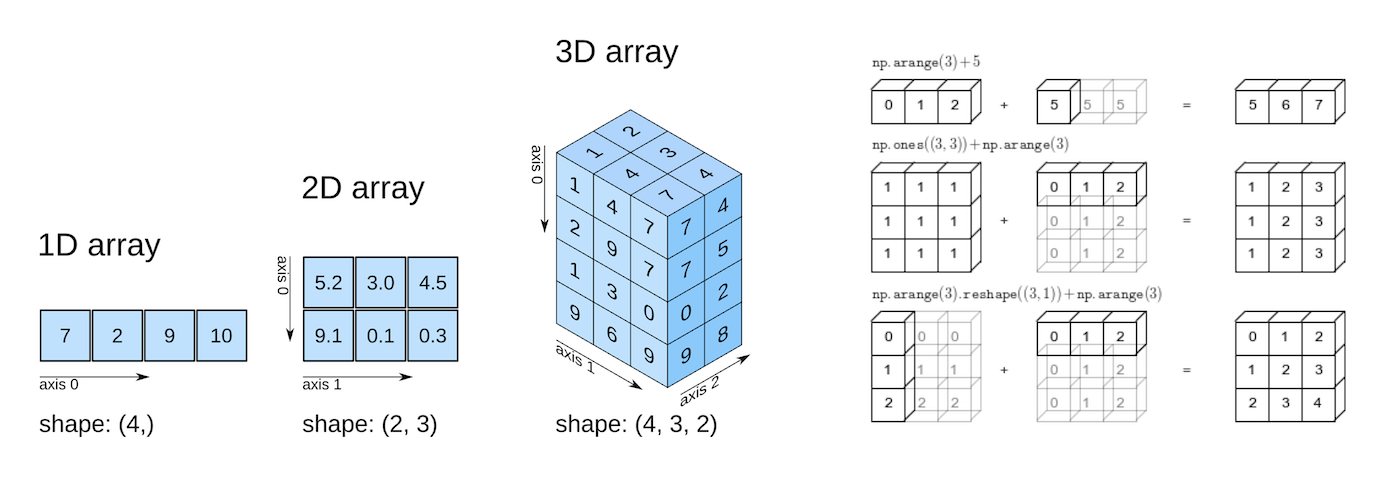


# Numpy array

- let's continue with the array we have built

In [ ]:
#retrieve elements of array

print(data)

print(data[1]) # what is this?

print(data[1,0])

- the indexing of numpy array element is the same as Python, and C/C++
    - index starts from 0, and runs to size - 1
    - in the case of multi-dimensional numpy array, the index runs to the size of the dimension - 1

In [ ]:
print(data.shape)
print(data[11])
print(data[11,3])

### What about negative index?

In [ ]:
print(data[-1])

In [ ]:
print(data[0])
print(data[0,-1])
print(data[0,-4])
print(data[0,-5])

The negative index is interpreted as the position from the end of the array to the beginning of the array, i.e., the inverse order 

### Slice and dice


In [ ]:
# what if only the first 3 rows are useful?

data_first_3rows = data[0:3]
print(data_first_3rows)

In [ ]:
# what if only the middle two entries of the 2nd dimension are useful?
data_middle_2_of_2ndD = data[:,1:3]
print(data_middle_2_of_2ndD)

# of course there's no need to give awkward names to these arrays

checknp(data[:,1:3])

In [ ]:
# how about keeping the last two entries of the 2nd dimension?
print(data[:,2:])
print(data[:,2:4])
print(data[:,2:5])

### shapes

In [ ]:
print(data.shape)

In [ ]:
datanew = np.reshape(data, (4,12))
print(data.shape)
print(datanew.shape)

In [ ]:
print(data)
print(datanew)

# regrouping the elements but the original structure is lost

In [ ]:
data_T = np.transpose(data)
checknp(data_T)

print(data_T)

# transpose 
# now the first dimension has four entries, 
# they are correspponding to the four different data variables (pop, tot. pop., area, GDP)

In [ ]:
# transpose could be done simply with .T
data_Transpose = data.T
print(data_Transpose)

In [ ]:
# try a simpler one
a = np.array([[1,2],[3,4]])

# what's the dimension here?
checknp(a)

In [ ]:
print(a)
print(a.T) 


### Array calculation

- we have total population and GDP for each country, and we can calculate GDP per capita


In [ ]:
# recall the 1st entry in the 2nd dimension is the GDP
print(data[:,0])


In [ ]:
# the 3rd entry is the total population
print(data[:,2])


In [ ]:
print(data[:,0] / data[:,2]) 
# so what is the rule here?


- in array operations, the operation takes place between elements of array
    - in other arrays are not used as matrices, by default

In [ ]:
# Let's what this means in practice

test = np.array([[1,0],[2,9]])
testInv = np.linalg.inv(test)

print(test)
print(testInv)

In [ ]:
print(test*testInv) # only need to see how -0.4444 comes out to know this is not matrix multiplication

In [ ]:
# Incidentally, you can use np.matmul method for matrix multiplication
product = np.matmul(test, testInv)
print(product)

# do we have an identity matrix?

# Uproot 

If you are proficient with Python or at least you are least familiar with operations earlier in this notebook, and if you have reached this part of the notebook while the lecture is still ongoing, then this is an open-ended explorative exercise for you.

## Background

In this part, we will be loading and analyzing data from a ROOT file. ROOT is a software package developed by physicists at CERN for High Energy Physics data analysis. If you can find everything you want to know about ROOT at this webpage https://root.cern/

While ROOT has many powerful functionalities for data analysis, we will not dedicate any significant fraction of this analysis to ROOT. Rather, we will load data from ROOT files to data structures such as numpy arrays and perform data analysis using Python libraries more widely used in the data science community.

## ROOT Tree 


## Uproot
There are many python software packages that convert root file to numpy arrays. Here we will use UPROOT. The full documentation of uproot can be found here
https://uproot.readthedocs.io/en/latest/index.html

and I would start with their `Getting Started Guide` examples https://uproot.readthedocs.io/en/latest/basic.html

### Below are some semi-structured guidelines

Because datahub@berkeley doesn't have uproot install, we will install it on the fly

In [ ]:
!pip install uproot awkward

In [ ]:
# once installed, let's import it

import uproot

#load a root file from somewhere. in this example, it is on the web, but usually it is on your local disk

# this file is provided by uproot authors for demos

file = uproot.open("https://scikit-hep.org/uproot3/examples/nesteddirs.root") 

# I have another root file here https://portal.nersc.gov/project/m3438/physics77/2012.root you can also check that out

# Let's what's inside the root file

print(file.keys())
print(file.classnames())



# directly open the object called 'events' in the root file
# N.B. this is a different file!!
events = uproot.open("https://scikit-hep.org/uproot3/examples/Zmumu.root:events")


# See what variables are available there
events.keys()

events.values()

# Loading a branch
mass = events['M']
type(mass)

# Other ways to browser variables in the file
# note that typenames are names of C++ types as ROOT files are created with C++
events.typenames()
events.show()

# How to load all the mass values to a numpy array
mass = events['M'].array(library='np')
mass.shape


# Load other variables
E1 = events['E1'].array(library='np')
E2 = events['E2'].array(library='np')

px1 = events['px1'].array(library='np')
px2 = events['px2'].array(library='np')

py1 = events['py1'].array(library='np')
py2 = events['py2'].array(library='np')

pz1 = events['pz1'].array(library='np')
pz2 = events['pz2'].array(library='np')

pz2.shape



A bit physics background:
* The variables that are in the events object (which corresponds to a TTree in ROOT) have the same shapes.
    * We saw mass has a shape of (2304,), so do pz2, E1, px1, etc.
    * in this example, the whole file contains a sample of collision events
    * there are 2304 collisions in this sample/file
* this sample of collisions all have exactly two leptons 
    * the kinematics of a lepton is described with its four momentum (E, momentum)
    * since momentum is a vector, the four momomentum, aka four vector, of the lepton, has four components (E, px, py, pz)
    * Einstein's mass momentum relation gives us $m^2 = E^2 - |\vec{p}|^2$
        * so you can calculate the mass of a lepton with the above formula, or simply $M = \sqrt{E^2 - (p_x^{2}+p_y^{2}+p_z^{2})}$
        
* can you calculate the mass for lepton1 and lepton2 and draw their distribution separately?
    * note that the numbers 1 and 2 in the variable names are indices of leptons.
    * i.e., E1, px1, py1, pz1 are properties of the same lepton, lepton 1; while those with 2 in name are properties of lepton 2
    
* can you calculate the mass of the di-lepton system?
    * what this means is that you consider the two leptons as a single physical system
    * as such, that dilepton system would have an Energy of E1+ E2, and a momentum of $\vec{p_{ll}} = \vec{p_{1}} + \vec{p_{2}}$. N.B. the momentum sum is always a vector sum
    * this quantity is also known as the invariant mass of dilepton system ($m_{ll}$)
    * how does this distribution look like?
    * how does the invariant mass of dilepton system compare to the sum of two individual lepton masses?


In [ ]:
# How about this file?

file = uproot.open("https://portal.nersc.gov/project/m3438/physics77/2012.root") 

print(file.keys())
print(file.classnames())

# I've opened the TTree for you
events2 = uproot.open("https://portal.nersc.gov/project/m3438/physics77/2012.root:tree_TYPE_DATA")


events2.show()



#### A bit physics background of this file

* this file contains a sample of collision events where there are always two photons
    * can you check how many events are in this sample?
    * the two photons are indexed as "leading" and "subleading", which are suffices in the variable names
        * i.e. ph_phi_leading, ph_eta_leading, ph_pt_leading as well as other ph_*_leading varialbes are properties of the leading photon. The same can be said about subleading photons
        
* in this file, the four momentum of a photon is not givne by E, px, py, pz, but rather than it is given by pT, eta, phi
    * we have the following relations to convert pT, eta, phi to E, px, py, pz
        * $p_x = p_{T} cos(\phi)$
        * $p_y = p_{T} sin(\phi)$
        * $p_z = p_{T} sinh(\eta)$
        * $E = p_{T} cosh(\eta)$
    * btw, why do we only need to know about three quantities (pT, eta, phi) to define the four momentum of photon which in principle has 4 DOFs?    
    
* can you calculate the invariant mass of the diphoton system consisting of the leading photon and subleading photon?
    * N.B. leading and subleading are the ordering of photons in pT. 
    * Leading photon's pT is greater than that of subleading photon
    * can you make a plot of the invariant mass distribution of diphoton?